In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\WDM\RAV16\Plates\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat')

In [3]:
df

,Chainage,Texture,Dropout
0,0.000344,-33.799999,0
1,0.001338,-32.799999,0
2,0.002332,-32.799999,0
3,0.003327,-32.700001,0
4,0.004321,-32.400002,0
...,...,...,...
8661,8.612305,-31.400000,0
8662,8.613299,-30.900000,0
8663,8.614294,-30.100000,0
8664,8.615288,-30.500000,0


In [4]:
# Regression using log values will not work with negative values
# this is because a log of a negative number is undefined !
# find the lowest Texture value 'min(Texture)' 
# make it positive and add it to the texture
# hey presto, all positive values with the plot/graph not changed...

minimum_texture = min(df.Texture)
adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
df['adjusted_Tex'] = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

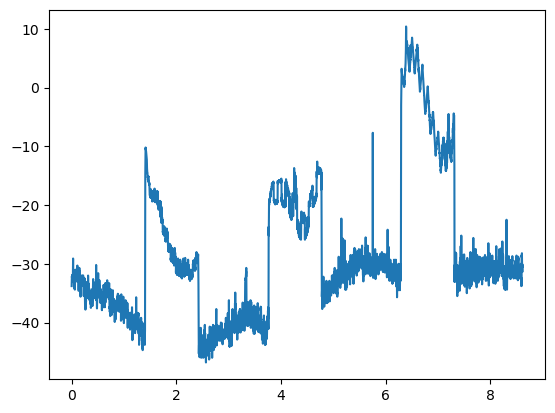

In [5]:
import matplotlib.pyplot as plt

plt.plot(df.Chainage, df.Texture)

In [6]:
import numpy as np
from scipy import signal
data = {}
data['before'] = df.Texture
data['after_fir'] = signal.lfilter(np.ones(len(data)), 1, data['before'])
data['after_iir'] = signal.lfilter([1], [1,-0.5], data['before'])



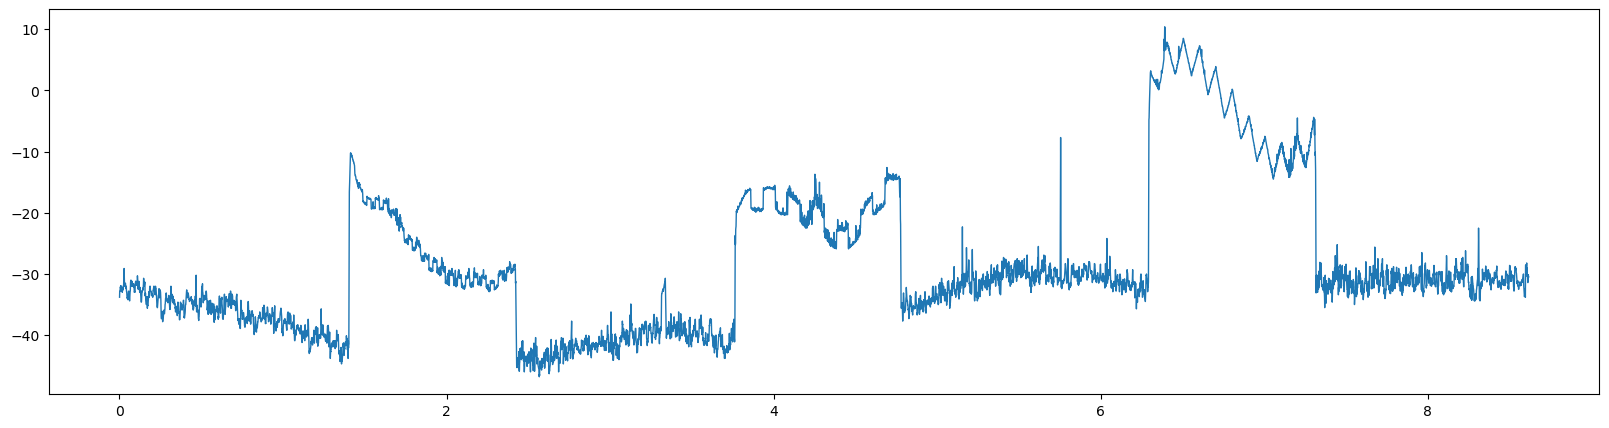

In [7]:
plt.subplots(figsize=(20,5))
plt.plot(df.Chainage, data['before'], label='before',lw=1)
#plt.plot(df.Chainage, data['after_fir'], label='FIR',lw=1)
#plt.plot(df.Chainage, data['after_iir'], label='IIR',lw=1)
#plt.subplots(figsize=(10,5))

In [8]:
# x_med = signal.medfilt(data['before'],3)
# plt.subplots(figsize=(20,5))
# plt.plot(x_med, label='median',lw=1)

In [9]:
# b = np.ones(3)/3
# plt.subplots(figsize=(20,5))
# x_filt = signal.lfilter(b,1,data['before'])
# plt.plot(x_filt)

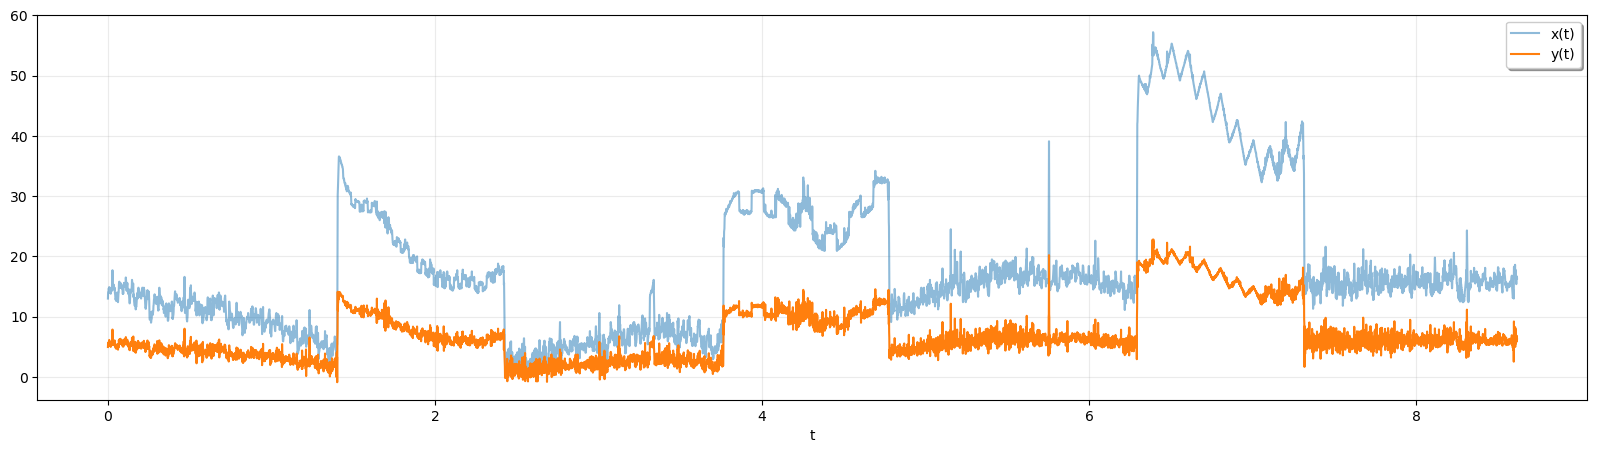

In [10]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import sosfiltfilt, butter

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
#sample_rate, data = scipy.io.wavfile.read(df.Texture)
#times = np.arange(len(data))/sample_rate

#sosfiltfilt(sos.)
x = df.adjusted_Tex
sos = butter(6, 0.125, btype='highpass', analog=True, output='sos')
y = sosfiltfilt(sos, x)
t=df.Chainage

from scipy.signal import sosfilt, sosfilt_zi
#sos8 = butter(8, 0.125, output='sos')
#zi = x[:4].mean() * sosfilt_zi(sos8)
#y2, zo = sosfilt(sos8, x, zi=zi)
plt.subplots(figsize=(20,5))
plt.plot(t, x, alpha=0.5, label='x(t)')
plt.plot(t, y, label='y(t)')
#plt.plot(t, y2, label='y2(t)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.xlabel('t')
#plt.subplots(figsize=(20,5))
plt.show()

In [67]:
import numpy as np
from scipy.signal import butter,sosfiltfilt
import plotly.graph_objects as go

#sample_rate = (len(df)/2)/max(df.Chainage)

sample_period = max(df.Chainage)
sample_rate = 8000
n = len(df) # total number of samples
nyq = 0.5 * sample_rate
cutoff=1
order=6 # started at 2
data = df.adjusted_Tex

def butter_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    sos = butter(order, normal_cutoff, btype='highpass', analog=True, output='sos')
    y = sosfiltfilt(sos, data)
    return y

# Filter the data, and plot both the original and filtered signals.
filtered_y = butter_filter(data, cutoff, sample_rate, order)
fig = go.Figure()
# fig.add_trace(go.Scatter(
#             y = data,
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
fig.add_trace(go.Scatter(
            y = filtered_y,
            line =  dict(shape =  'linear',
                         width=1 ),
            name = 'filtered signal'
            ))
fig.show()

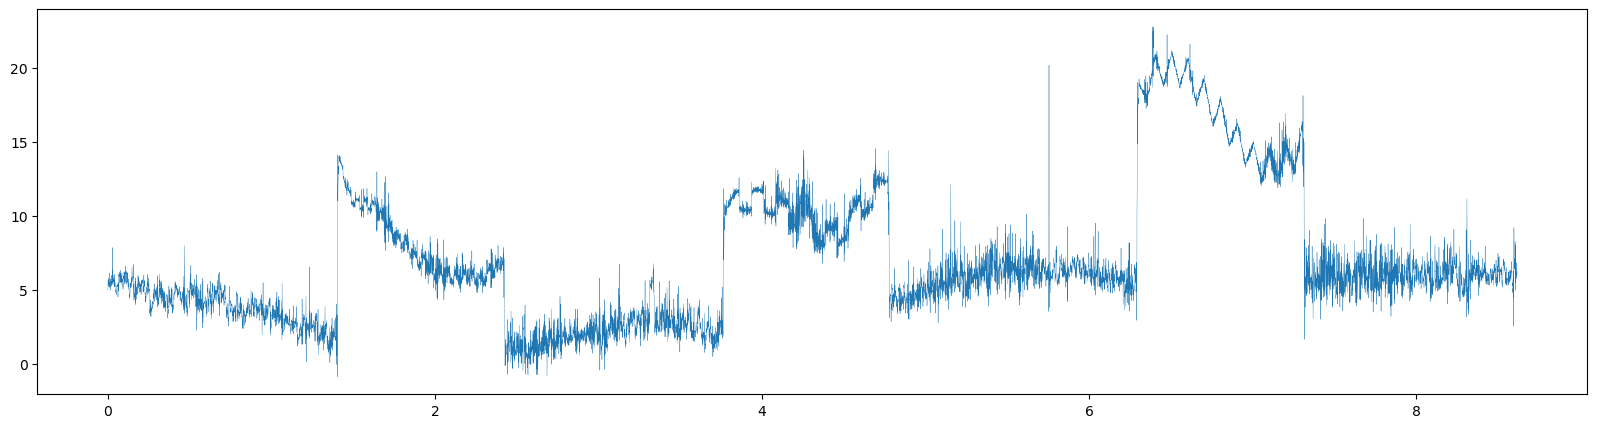

In [60]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0, 500

#x = np.arange(1, len(df), 0.1)  # x axis
#z = np.random.normal(mu, sigma, len(x))  # noise
# y from previous cell
#y = x ** 2 + z  # data
plt.subplots(figsize=(20,5))
plt.plot(t, y, linewidth=0.25)  # it includes some noise

from scipy.signal import lfilter

n = 30  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, y)
#plt.plot(x, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter

# from scipy.signal import savgol_filter
# w = savgol_filter(y, 50, 2)
# plt.plot( w, x, 'b')  # high frequency noise removed

In [32]:
# the frequency of the noise is the length of the signal/2
noise_frequency = (len(df)/2)/ max(df.Chainage)

sos = signal.butter(4, Wn=(noise_frequency/4), btype='highpass', fs=(noise_frequency*2), output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show() 


NameError: name 'sig' is not defined

In [11]:
# max(df.Chainage)/len(df.Chainage) * 2

In [12]:
# n = len(df.Chainage)
# fhat = np.fft.fft(y, n) #computes the fft
# psd = fhat * np.conj(fhat)/n
# #freq = (1/(dt*n)) * np.arange(n) #frequency array
# hertz = max(df.Chainage)/len(df.Chainage) * 2
# idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

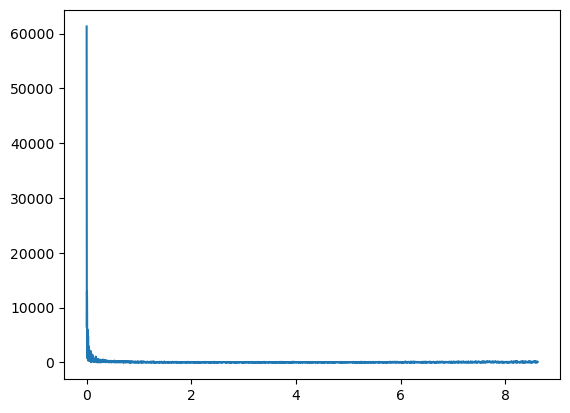

In [13]:
# remove the noise from the filtered signal
# the filtered signal is y from cell above

from scipy.fft import rfft,rfftfreq
n    = len(t)
yf   = rfft(y)
x =df.Chainage[::2]

y=np.abs(yf)
y = np.delete(y, -1)
#xf   = rfftfreq(n,data_step)
plt.plot(x,y)

0.000994262919801523
8.616282463


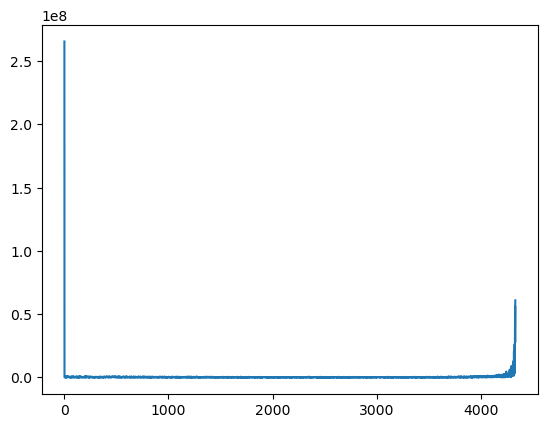

In [20]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
SAMPLE_RATE = max(df.Chainage)/len(df.Chainage)
print(SAMPLE_RATE)
DURATION = max(df.Chainage)
print(DURATION)
N = int(len(df))
temp_fft = scipy.fftpack.fft(np.array(y))
yf = scipy.fftpack.fft(temp_fft, axis=-1)
#yf = fft(normalized_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(np.abs(yf))
plt.show()

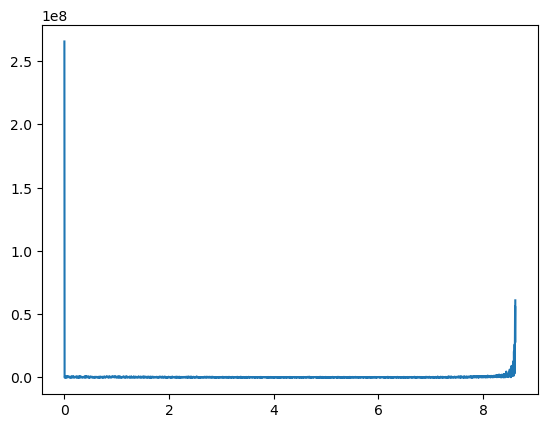

In [24]:
#points_per_freq = len(xf)/(SAMPLE_RATE/2)
#target_idx = int(points_per_freq * 4000)
xf = df.iloc[1::2]
xf= xf.Chainage
yf[1 : 4] = 0
plt.plot(xf, np.abs(yf))
plt.show()

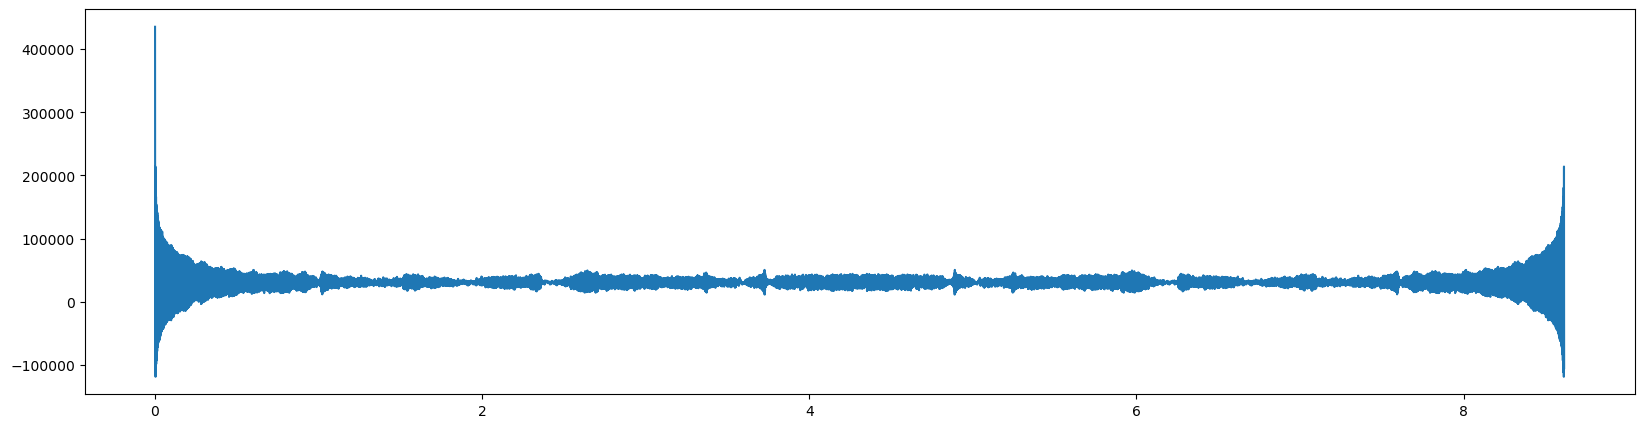

In [29]:
from scipy.fft import irfft

new_sig = irfft(yf)
df_sub = df.head(-2)
plt.subplots(figsize=(20,5))
plt.plot(df_sub.Chainage, new_sig)
plt.show()

In [ ]:
import scipy.signal

d1 = df.Texture
N = len(d1)
#d1_fft = fft(df.adjusted_Tex)
x_axis = d1[1:N]
#f = LinRange(-0.5, 0.5, N+1)[1:N]  # normalized frequency 
fs = 1;   # sampling frequency
fc = 0.005;  # frequency cutoff, less than Fnyquist=0.5
filt = digitalfilter(Highpass(fc,fs=fs), Butterworth(6));
d2 = filtfilt(filt, d1)  #filtered signal
p1 = plot(x_axis[1:N], d2[1:N], lw=1,label="Filtered flipped signal",xlabel="Time", legend=topleft)
#plot!(t[1:N÷2], d3_trunc[1:N÷2], ls=:dash,lc=:black, lw=1,label="From truncated spectrum (100 points)")
plot(p1, size=(4000,1000))

In [ ]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(df.Texture)
times = np.arange(len(data))/sample_rate

# Apply a 10-50 Hz high-pass filter to the original data
filtered = bandpass(data, [10, 50], sample_rate)